#### Pawdacity - A pet store in the USA wants to get insight about their sales. The data available, when combined will help them understand the sales pattern 
#### In their retail stores across several cities. You start by cleaning and combining few of the available datasets

# Importing the datasets

### Load the necessary libraries

In [1]:
import pandas as pd

### Load the datasets

In [2]:
web = pd.read_csv("web.csv")
demographics = pd.read_csv("demographic.csv")

# Cleaning web Dataset

### Sample the web dataset

In [3]:
web.head(10)

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>"
1,Albin|Laramie,<td>185</td>,<td>181</td>,<td>120</td>
2,Alpine|Lincoln,<td>845</td>,<td>828</td>,<td>550</td>
3,Baggs|Carbon,<td>439</td>,<td>440</td>,<td>348</td>
4,Bairoil|Sweetwater,<td>107</td>,<td>106</td>,<td>97</td>
5,Bar Nunn|Natrona,"<td>2,735</td>","<td>2,213</td>",<td>936</td>
6,Basin ?|Big Horn,"<td>1,312</td>","<td>1,285<sup id=""cite_ref-4"" class=""reference...","<td>1,238</td>"
7,Bear River|Uinta,<td>521</td>,<td>518</td>,<td>-</td>
8,Big Piney|Sublette,<td>538</td>,<td>552</td>,<td>408</td>
9,Buffalo ?|Johnson,"<td>4,615</td>","<td>4,585</td>","<td>3,900</td>"


### Get basic information about the dataset
###### Write in detail atleast five things about the dataset

In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City|County    99 non-null     object
 1   2014 Estimate  103 non-null    object
 2   2010 Census    103 non-null    object
 3   2000 Census    103 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


### Split the Count and City column in web dataset

In [5]:
web[["City","County"]] = web["City|County"].str.split("|", expand = True)

### Drop the City|County column

In [6]:
web.drop(columns = "City|County", inplace = True)

### Reorder the columns
### You should have something like the image shown

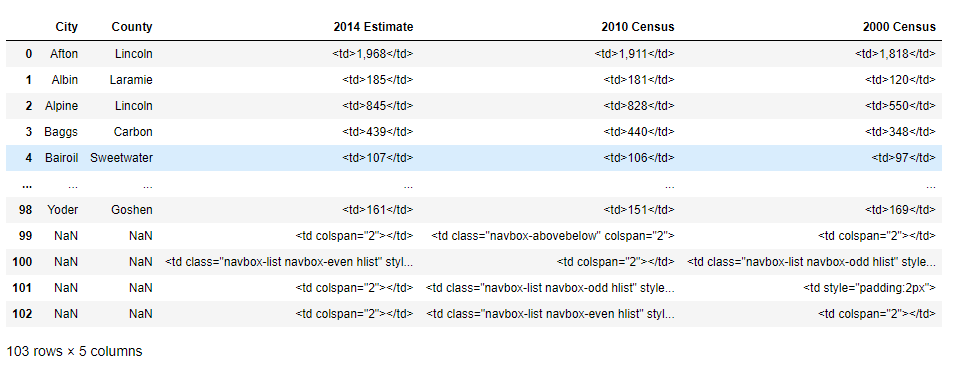

In [7]:
web = web[["City","County","2014 Estimate","2010 Census","2000 Census"]]

### Remove invalid characters from dataset
###### You may needd to use the LEFT and/or RIGHT function
###### You may also need to view the entire dataset

In [8]:
web[["City","County","2014 Estimate","2010 Census","2000 Census"]] = web[["City","County","2014 Estimate","2010 Census","2000 Census"]].replace("<td>|</td>|\?|,","",regex = True)

web["2010 Census"] = web["2010 Census"].str[:6]

web["2010 Census"] = web["2010 Census"].str.replace("<s","")
web.head(10)

,City,County,2014 Estimate,2010 Census,2000 Census
0,Afton,Lincoln,1968,1911,1818
1,Albin,Laramie,185,181,120
2,Alpine,Lincoln,845,828,550
3,Baggs,Carbon,439,440,348
4,Bairoil,Sweetwater,107,106,97
5,Bar Nunn,Natrona,2735,2213,936
6,Basin,Big Horn,1312,1285,1238
7,Bear River,Uinta,521,518,-
8,Big Piney,Sublette,538,552,408
9,Buffalo,Johnson,4615,4585,3900


### Replace spaces with underscores

In [9]:
web[["City","County"]] = web[["City","County"]].replace(" ","_",regex = True)

### Remove leading and trailing underscores in the City and County columns
###### You may need to do each column separately

In [10]:
web["City"] = web["City"].str.strip("_")
web["County"] = web["County"].str.strip("_")

### Drop the rows that have unuseful data
### You should have something like the image shown 

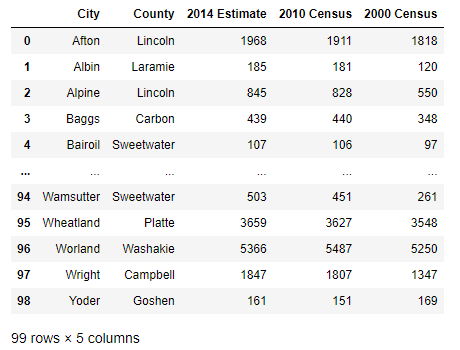

In [11]:
web = web.drop(index = [99,100,101,102])

# Cleaning demographics dataset

### Do all necessary cleaning needed on the dataset and make it as clean as the WEB dataset

In [12]:
demographics["City"] = demographics["City"].str.replace(" ","_")
demographics["County"] = demographics["County"].str.replace(" ","_")
demographics["County"] = demographics["County"].str.strip("_")
demographics["City"] = demographics["City"].str.strip("_")

# Combining the datasets

### combine both dataset together. The combining criteria should be on City and County
### You should have something like the image shown 

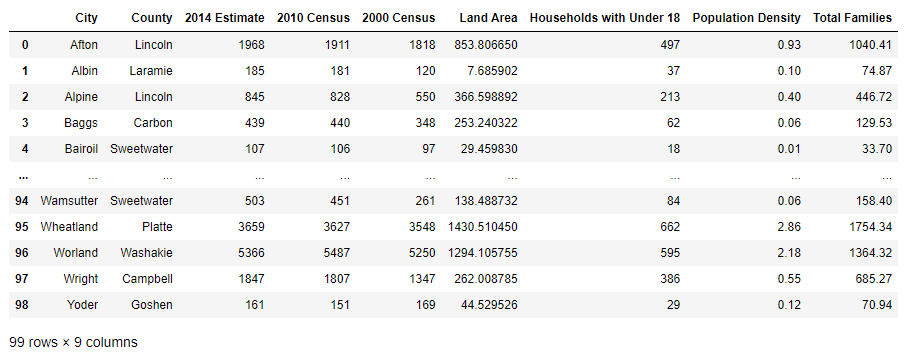

In [13]:
Demographics = pd.merge(web,demographics, on = ["City", "County"])

### Write (save) the dataset to a coma separated file named "Demographics"

In [14]:
Demographics = pd.merge(web,demographics, on = ["City", "County"])